## Purchase amount prediction on black friday 

The dataset can be found at : https://www.kaggle.com/datasets/sdolezel/black-friday

The aim of this project is to understand **customer purchase behaviour** based on their purchases from the last month. Specifically we want to predict the purchase amount for various products across different categories so that we can tailor personalized offers for customers. Lastly , we want to build a model that can **predict** the **purchase amount** for a customer given various factors. Why is this important?

- By predicting the purchase amount, the company can tailor their marketing and sales strategies.
- Personalized offers can enhance customer satisfaction and loyalty, potentially increasing sales.

Not only that, this is a **regression problem**

## Data Dictionary


| Feature | Description |
| --- | --- |
| User_id | Unique customer id |
| Product_ID | Unique product id |
| Gender | Customer's sex |
| Age | Age group of the customer |
| Occupation | Occupation code of the customer (numerical representation) |
| Stay_In_Current_City_Years | Number of years the customer has stayed in the current city|
| Marital_Status | Marital status of the customer (0 for Single, 1 for Married)|
| Product_Category_1 to Product_Category_3| Category of the product. All 3 are already labelled with numbers. |
| Purchase | Purchase amount  |

In [61]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline

## Cleaning and preparing data for model training

In [108]:
df_train = pd.read_csv("train.csv")
print(f"train shape :{df_train.shape}")

train shape :(550068, 12)


In [63]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [65]:
df_train.describe(include = "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


- There is some missing values for product_category_2 and product_category_3

In [66]:
# We can drop the user_id column as it does not provide any predictive power in our analysis
df_train.drop(["User_ID"], axis = 1 , inplace = True)

In [67]:
df_train.head(1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370


In [68]:
# let's check out the numerical columns and the categorical columns
numerical_cols = df_train.select_dtypes(include=["number"])
categorical_cols = df_train.select_dtypes(include=["object"])

print("Numerical columns:")
print(numerical_cols.columns.tolist())
print("\nCategorical columns:")
print(categorical_cols.columns.tolist())

Numerical columns:
['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

Categorical columns:
['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


- We have to **handle the categorical columns** because models can only handle numerical values

In [69]:
# Checking null values
missing_values_sum = df_train.isnull().sum()

print("Sum of missing values in each column:")
print(missing_values_sum)

Sum of missing values in each column:
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [70]:
# Get the column names
cols = df_train.columns

# Iterate through each column
for col in categorical_cols:
    unique_values = df_train[col].unique()  # Get unique values for the column
    print(f"Unique values for column '{col}':")
    print(unique_values)
    print()  # Print an empty line for clarity

Unique values for column 'Product_ID':
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

Unique values for column 'Gender':
['F' 'M']

Unique values for column 'Age':
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Unique values for column 'City_Category':
['A' 'C' 'B']

Unique values for column 'Stay_In_Current_City_Years':
['2' '4+' '3' '1' '0']



In [71]:
# Let's handle the gender column by using one hot encoding
df_train['Gender'] = df_train["Gender"].map({"F" : 0 , "M" : 1})
df_train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [72]:
# Let's handle the age column by using ordinal encoding in increasing order of age group

df_train['Age'] = df_train["Age"].map({'0-17' : 0 , "18-25" : 1 , "26-35" : 2 ,  "36-45" : 3 ,  "46-50" : 4 , "51-55" : 5, "55+" : 6})
df_train["Age"] = df_train["Age"].astype(int)
df_train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969


In [73]:
# Let's handle the City_Category as well using pd.get_dummies because there is more than 2 categories

city_dummies = pd.get_dummies(df_train["City_Category"], drop_first = True , prefix = "City")
df_train = pd.concat([df_train, city_dummies], axis=1)
df_train.drop(["City_Category"], axis = 1 , inplace = True)
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_B,City_C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,False,False
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422,False,False
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057,False,False
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969,False,True


In [74]:
# Let's handle Stay_In_Current_City_Years variable
df_train["Stay_In_Current_City_Years"] = df_train["Stay_In_Current_City_Years"].str.replace("+" , "")
df_train["Stay_In_Current_City_Years"] = df_train["Stay_In_Current_City_Years"].astype(int)

### Handling missing values in Product_Category_2	and Product_Category_3

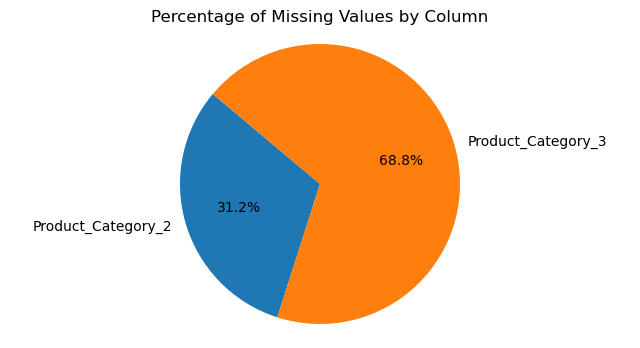

In [75]:
# Calculate the percentage of missing values for each column
missing_percent = df_train.isnull().sum() / len(df_train) * 100

# Filter only the columns with missing values
missing_percent = missing_percent[missing_percent > 0]



plt.figure(figsize=(8, 4))
plt.pie(missing_percent, labels=missing_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Missing Values by Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Since we have printed out the unique values for these 2 columns previously , we have learned that the values in this columns are discrete. Not only that , we can drop Product_Category_3 column because it has nearly 70% missing values so it can't give us much information , so we will drop the column.

In [76]:
df_train["Product_Category_2"].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [77]:
# Fill missing values for Product_Category_2 with the mode imputation
prod2_mode = df_train["Product_Category_2"].mode()[0]
df_train["Product_Category_2"].fillna(prod2_mode, inplace=True)

In [78]:
# Dropping Product_Category_3 column
df_train.drop(["Product_Category_3"] , axis = 1 , inplace = True)

In [79]:
df_train.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
City_B                        0
City_C                        0
dtype: int64

In [80]:
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_B,City_C
0,P00069042,0,0,10,2,0,3,8.0,8370,False,False
1,P00248942,0,0,10,2,0,1,6.0,15200,False,False
2,P00087842,0,0,10,2,0,12,8.0,1422,False,False
3,P00085442,0,0,10,2,0,12,14.0,1057,False,False
4,P00285442,1,6,16,4,0,8,8.0,7969,False,True


In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   City_B                      550068 non-null  bool   
 10  City_C                      550068 non-null  bool   
dtypes: bool(2), float64(1), int32(2), int64(5), object(1)
memory usage: 34.6+ MB


In [82]:
# converting City_B and City_C to numeric values to be pass to our model later on
df_train ['City_B'] = df_train['City_B'].astype(int)
df_train['City_C'] = df_train['City_C'].astype(int)

In [83]:
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_B,City_C
0,P00069042,0,0,10,2,0,3,8.0,8370,0,0
1,P00248942,0,0,10,2,0,1,6.0,15200,0,0
2,P00087842,0,0,10,2,0,12,8.0,1422,0,0
3,P00085442,0,0,10,2,0,12,14.0,1057,0,0
4,P00285442,1,6,16,4,0,8,8.0,7969,0,1


### Exploratory Data analysis

In [84]:
import plotly.express as px

temp_df = df_train.drop(["Product_ID"] , axis = 1)
px.imshow(temp_df.corr() , text_auto = True)

- So far only Product_Category_1 is the stand out variable for a negative correlation 

Text(0.5, 1.0, 'Age vs Purchase')

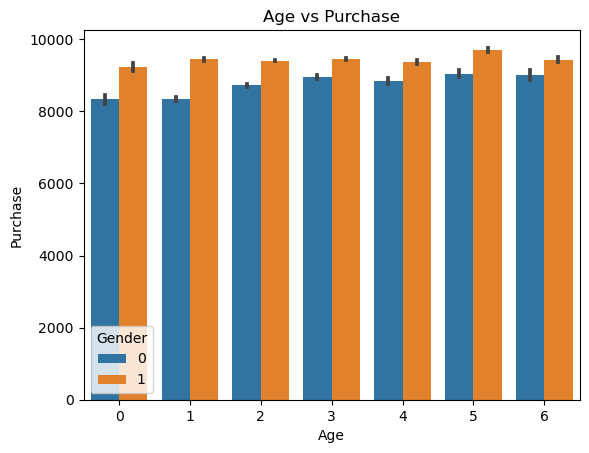

In [85]:
sns.barplot(x = "Age" , y = "Purchase" , hue = "Gender" , data = df_train)
plt.title("Age vs Purchase")

- The Men have done higher purchases amounts compared to women in all age categories. My hypothesis , is that more men have jobs in this dataset. We can check it out in the occupation column

Text(0.5, 1.0, 'Occupation vs Purchase')

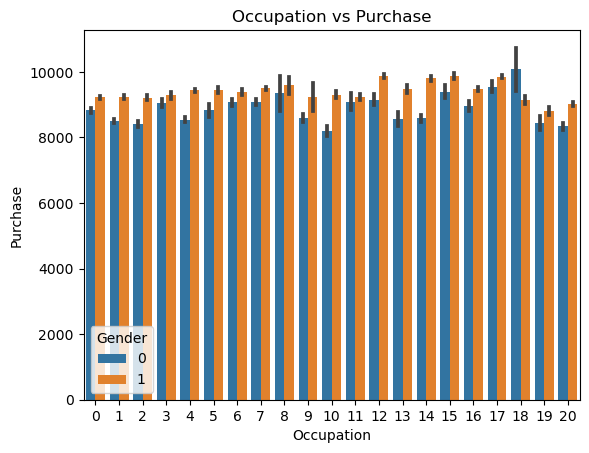

In [86]:
sns.barplot(x = "Occupation" , y = "Purchase" , hue = "Gender" , data = df_train)
plt.title("Occupation vs Purchase")

- Yes, just like we expected , majority of the men seem to have more jobs in a particular occupation compared to women

Text(0.5, 1.0, 'Gender per transaction')

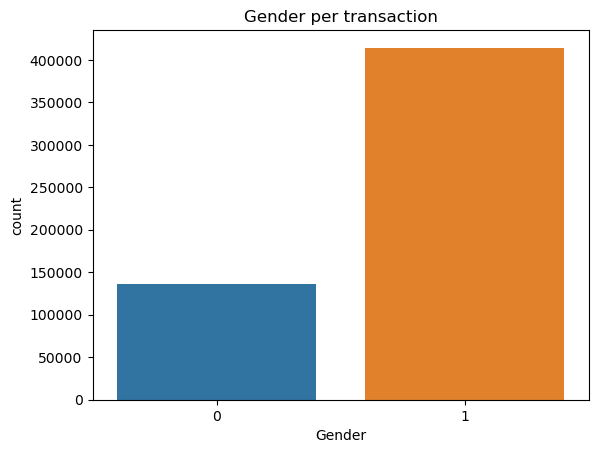

In [87]:
sns.countplot(x ='Gender', data = df_train)
plt.title('Gender per transaction')

- There is also a gender gap where by there is more males then females in this dataset

In [88]:
num_cols = df_train.select_dtypes(include=["number"])
num_list = num_cols.columns.to_list()
num_list.remove("Purchase")
num_list

['Gender',
 'Age',
 'Occupation',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'City_B',
 'City_C']

In [89]:
#sns.regplot(x="Product_Category_1" , y = "Purchase" , data = df_train)

In [90]:
#sns.regplot(x="Product_Category_2" , y = "Purchase" , data = df_train)

## Customer Segmentation Analysis 

In [91]:
# Defining thresholds for segmentation (demonstration purposes not exact numbers)
high_threshold = 15000
medium_threshold = 5000

# Segmenting function
def segmenting(purchase):
    if purchase >= high_threshold:
        return "High Spender"
    elif medium_threshold <= purchase < high_threshold:
        return "Moderate Spender"
    else:
        return "Low Spender"
    
    
df_train["Segment"] = df["Purchase"].apply(segmenting)

df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_B,City_C,Segment
0,P00069042,0,0,10,2,0,3,8.0,8370,0,0,Moderate Spender
1,P00248942,0,0,10,2,0,1,6.0,15200,0,0,High Spender
2,P00087842,0,0,10,2,0,12,8.0,1422,0,0,Low Spender
3,P00085442,0,0,10,2,0,12,14.0,1057,0,0,Low Spender
4,P00285442,1,6,16,4,0,8,8.0,7969,0,1,Moderate Spender


### Demographic analysis of spenders

In [92]:
df_train["Segment"].value_counts()

Segment
Moderate Spender    344622
High Spender        110523
Low Spender          94923
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender and Segment')

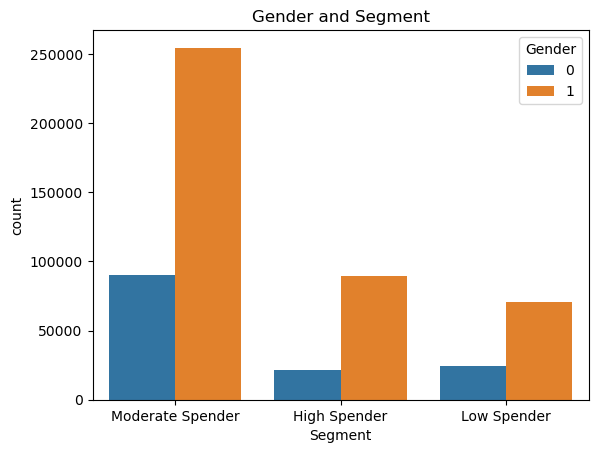

In [93]:
sns.countplot(x = "Segment" , hue = "Gender" , data = df_train)
plt.title("Gender and Segment")

Text(0.5, 1.0, 'Age and Segment')

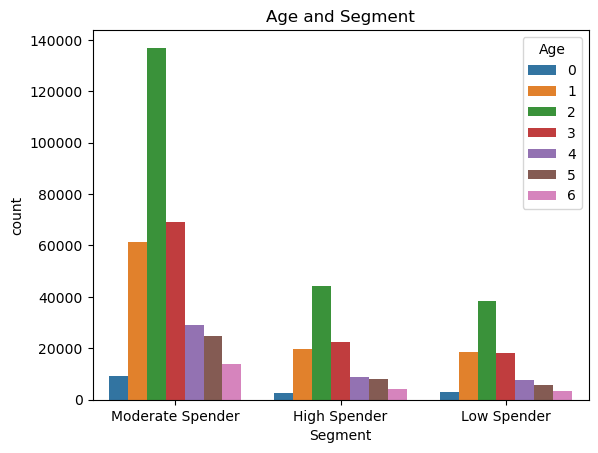

In [94]:
sns.countplot(x = "Segment" , hue = "Age" , data = df_train)
plt.title("Age and Segment")

So far it is interesting to note that:
   - Ages 45-50 are the huge spenders in each segment , my hypothesis is that people in this range are already working and definitely can spend on goods
   - Male are the huge spenders in each segment , as it is evident in this dataset , males have more jobs than females

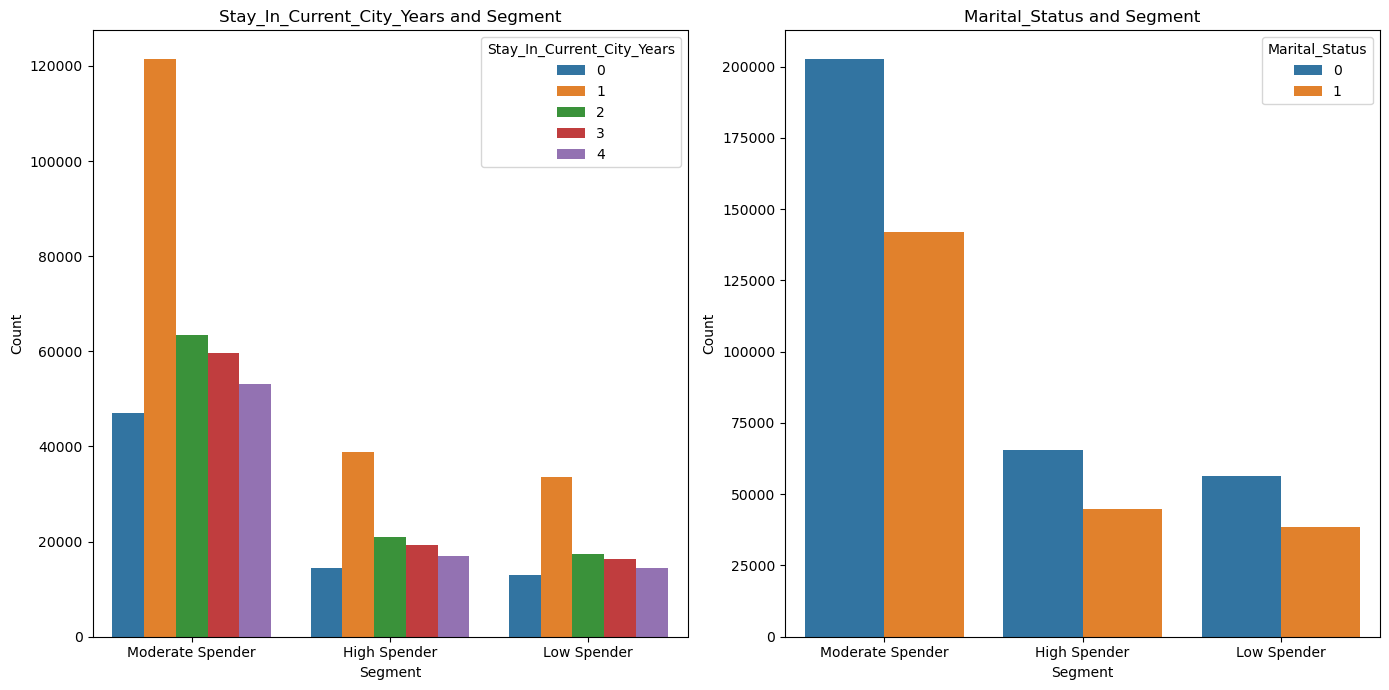

In [95]:
# Features to plot
feature_list = ["Stay_In_Current_City_Years", "Marital_Status"]

# Create subplots
plt.figure(figsize=(14, 7))

for i, feature in enumerate(feature_list, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x='Segment', hue=feature, data=df_train)
    plt.title(f"{feature} and Segment")
    plt.xlabel('Segment')
    plt.ylabel('Count')

plt.tight_layout()

- In all segments , the first year of staying the city , a lot of spending has been done. My hypothesis is that , in the first year , newer residents may need to spend a lot on their new homes
- Suprsingly , the single customers spend more than the married customers. My hypothesis is that , married couples may be more frugal in their spendings as they may have kids, hence they need to be financially responsible

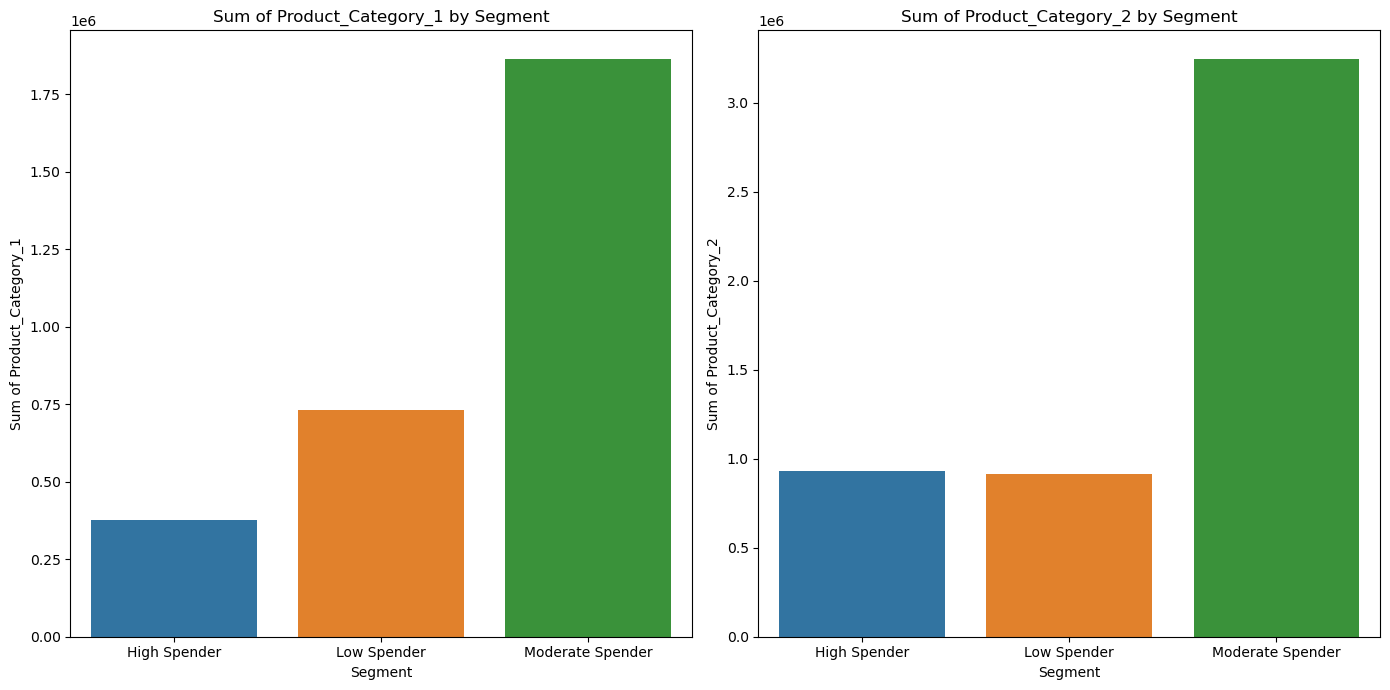

In [96]:
# Group by Segment and sum Product Categories
product_category_1_sum = df_train.groupby('Segment')['Product_Category_1'].sum()
product_category_2_sum = df_train.groupby('Segment')['Product_Category_2'].sum()

# Convert grouped data to DataFrame for plotting
product_category_1_sum_df = product_category_1_sum.reset_index()
product_category_2_sum_df = product_category_2_sum.reset_index()

# Plotting
plt.figure(figsize=(14, 7))

# Plot Product_Category_1 sum
plt.subplot(1, 2, 1)
sns.barplot(x='Segment', y='Product_Category_1', data=product_category_1_sum_df)
plt.title('Sum of Product_Category_1 by Segment')
plt.xlabel('Segment')
plt.ylabel('Sum of Product_Category_1')

# Plot Product_Category_2 sum
plt.subplot(1, 2, 2)
sns.barplot(x='Segment', y='Product_Category_2', data=product_category_2_sum_df)
plt.title('Sum of Product_Category_2 by Segment')
plt.xlabel('Segment')
plt.ylabel('Sum of Product_Category_2')

plt.tight_layout()

- Product Category 2 is bought by more customers than Product Category 1 in all segments. My hypothesis is that , Product Category 2 could be groceries and Product Category 1 could be electronics for example. Groceries is really essential and electronics is essential as well but not as much as groceries

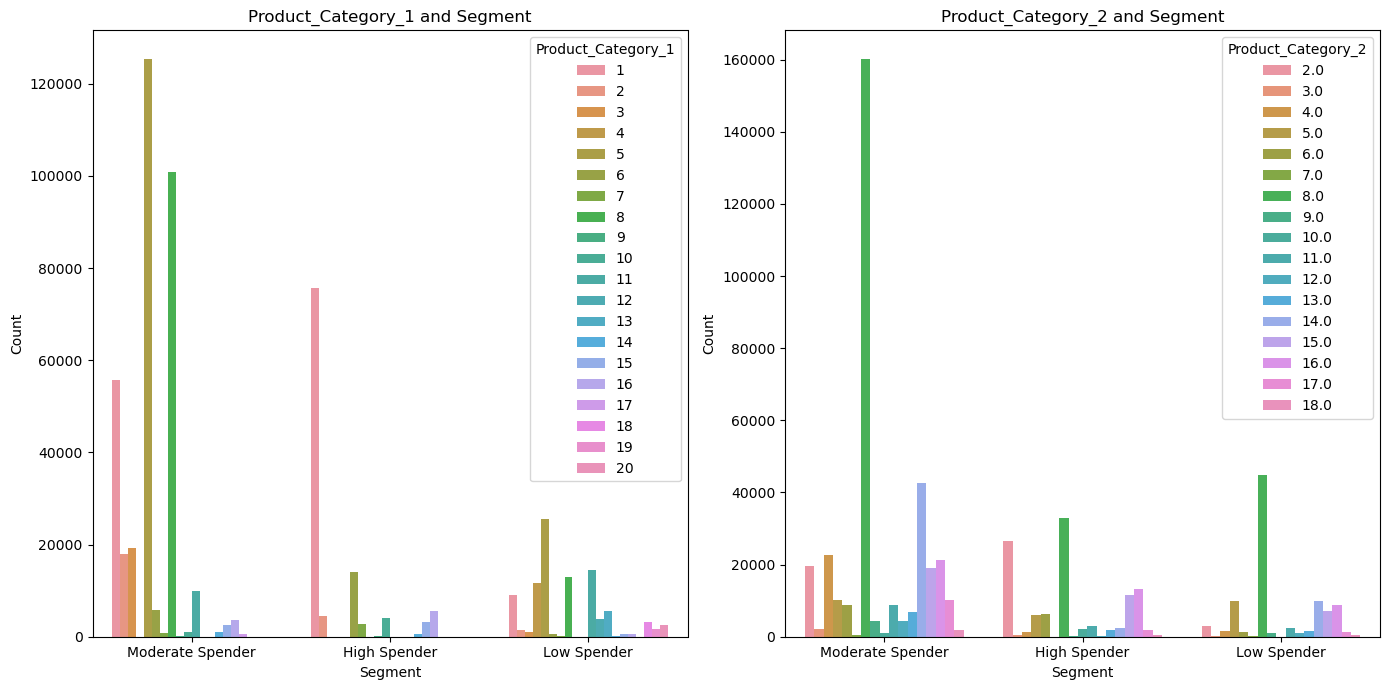

In [106]:
# Features to plot
feature_list = ["Product_Category_1", "Product_Category_2"]

# Create subplots
plt.figure(figsize=(14, 7))

for i, feature in enumerate(feature_list, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x='Segment', hue=feature, data=df_train)
    plt.title(f"{feature} and Segment")
    plt.xlabel('Segment')
    plt.ylabel('Count')

plt.tight_layout()

### Model Training 

In [97]:
df = df_train.drop(["Product_ID" , "Segment"] , axis = 1)
y = df["Purchase"]
X = df.drop(["Purchase"] , axis = 1)

In [98]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_B,City_C
0,0,0,10,2,0,3,8.0,8370,0,0
1,0,0,10,2,0,1,6.0,15200,0,0
2,0,0,10,2,0,12,8.0,1422,0,0
3,0,0,10,2,0,12,14.0,1057,0,0
4,1,6,16,4,0,8,8.0,7969,0,1


In [99]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.3 , random_state=42)

print(f" x_train shape : {X_train.shape}")
print(f" x_train shape : {X_test.shape}")

 x_train shape : (385047, 9)
 x_train shape : (165021, 9)


In [100]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [101]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error , r2_score

model = LinearRegression()
model.fit(X_train , y_train)

# make predictons
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 22080643.125412226
R² Score: 0.1238631054160434


- Linear Regression performs really poorly , let's try other machine learning models that is more suiable for our dataset
- Let's check if there high variance in our variables 

In [102]:
variances = X.var()

print(variances)


Gender                         0.185938
Age                            1.832319
Occupation                    42.545100
Stay_In_Current_City_Years     1.662662
Marital_Status                 0.241838
Product_Category_1            15.493760
Product_Category_2            18.439233
City_B                         0.243642
City_C                         0.214351
dtype: float64


In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score, KFold

model = RandomForestRegressor(random_state = 42)
model.fit(X_train , y_train)

# make predictons
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 9168787.283177411
R² Score: 0.6361920813738092


- The RandomForestRegressor definitely performs much more better than the linear regression model 

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 9168787.283177411
R² Score: 0.6361920813738092


- GradientBoostingRegressor performs **slighlty more better** than RandomForestRegressor

In [105]:
### Conclusion 
# Get feature importances
feature_importances = model.feature_importances_

# Match feature importances with corresponding feature names
feature_names = X.columns  
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)


                      Feature  Importance
5          Product_Category_1    0.825742
2                  Occupation    0.047798
3  Stay_In_Current_City_Years    0.034195
1                         Age    0.029071
6          Product_Category_2    0.028161
4              Marital_Status    0.013115
0                      Gender    0.010525
7                      City_B    0.006266
8                      City_C    0.005128


- Product_Category_1 is dominant in terms of feature importance for GradientBoostingRegressor

## Conclusion

The analysis successfully demonstrated the value of using machine learning models to predict purchase amounts and segment customers for tailored marketing strategies. By leveraging the Gradient Boosting Regressor, the company can predict customer purchase behavior with reasonable accuracy, allowing for effective segmentation.

These segments provide a strategic basis for targeted marketing efforts, ensuring that each customer receives personalized offers that align with their purchasing habits and preferences. This approach can significantly enhance customer satisfaction, loyalty, and overall sales performance.

**Methodology**

a) Data Preparation:

The dataset was cleaned and preprocessed, including **encoding categorical variables** and **handling missing values**.
Features such as Gender, Age, Occupation, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, City_Category were used to predict purchase amounts.

b) Model Training:

A **Gradient Boosting Regressor** was used to predict purchase amounts based on the selected features.
The model's performance was evaluated using **Mean Squared Error (MSE) and R² Score**, achieving satisfactory results.

c) Customer Segmentation:

Customers were **segmented** into three groups based on purchase amounts:
High Spenders (predicted purchase >= 15,000)
Moderate Spenders (predicted purchase between 5,000 and 15,000)
Low Spenders (predicted purchase < 5,000)

d) Product Recommendations:

Historical purchase data was analyzed to identify **top product categories** for each segment.